## Tensorflow v2 Logistic Regression
- https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/2_BasicModels/logistic_regression.ipynb

In [26]:
import numpy as np
import tensorflow as tf
import time

from matplotlib import pyplot as plt

### Parameters

In [27]:
# MNIST Dataset
N_CLASSES = 10      # 0 ~ 9 
N_FEATURES = 784    # 28 * 28

In [57]:
# Training
LR = 0.001
N_TRAIN_STEP = 1000
BATCH = 50
N_DISPLAY_STEP = 50
SEED = 5000

### Data Preparation

In [29]:
from tensorflow.keras.datasets import mnist

In [30]:
# Load data (60000 / 10000, 28, 28), (60000 / 10000, )
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [31]:
# Preprocessing (Normalize / Flatten)
x_train, x_test = x_train.astype(np.float32) / 255.0, x_test.astype(np.float32) / 255.0
x_train, x_test = x_train.reshape([-1, N_FEATURES]),  x_test.reshape([-1, N_FEATURES])

In [32]:
# Tensorflow Data API (Shuffle / Batch)
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(SEED).batch(BATCH).prefetch(1)

### Create Model

In [58]:
# Model Parameter
W = tf.Variable(tf.ones([N_FEATURES, N_CLASSES]), name='weight')
b = tf.Variable(tf.zeros([N_CLASSES]), name='bias')

In [34]:
# Model
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

In [35]:
# Loss -- Cross Entropy
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=N_CLASSES)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1)

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), 1))

In [36]:
# Metric -- Accuracy
def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [59]:
# Optimization
optimizer = tf.optimizers.Adam(LR)

def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    # Compute gradient
    gradients = g.gradient(loss, [W, b])

    # Update
    optimizer.apply_gradients(zip(gradients, [W, b]))

### Train Model

In [60]:
for step, (batch_x, batch_y) in enumerate(train_data.take(N_TRAIN_STEP), 1):
    run_optimization(batch_x, batch_y)

    if step % N_DISPLAY_STEP == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)

        print('Step: %d, Loss: %.2f, Acc: %.2f' % (step, loss, acc))

Step: 50, Loss: 1.15, Acc: 0.86
Step: 100, Loss: 0.90, Acc: 0.76
Step: 150, Loss: 0.68, Acc: 0.90
Step: 200, Loss: 0.77, Acc: 0.80
Step: 250, Loss: 0.72, Acc: 0.78
Step: 300, Loss: 0.48, Acc: 0.92
Step: 350, Loss: 0.52, Acc: 0.86
Step: 400, Loss: 0.58, Acc: 0.84
Step: 450, Loss: 0.49, Acc: 0.84
Step: 500, Loss: 0.31, Acc: 0.96
Step: 550, Loss: 0.38, Acc: 0.90
Step: 600, Loss: 0.61, Acc: 0.84
Step: 650, Loss: 0.56, Acc: 0.88
Step: 700, Loss: 0.37, Acc: 0.88
Step: 750, Loss: 0.48, Acc: 0.88
Step: 800, Loss: 0.36, Acc: 0.92
Step: 850, Loss: 0.39, Acc: 0.88
Step: 900, Loss: 0.36, Acc: 0.90
Step: 950, Loss: 0.46, Acc: 0.86
Step: 1000, Loss: 0.34, Acc: 0.92


### Evaluation

In [61]:
# Accuracy
pred = logistic_regression(x_test)
print('Test Acc: %.2f' % accuracy(pred, y_test))

Test Acc: 0.91


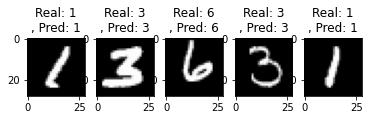

In [63]:
# Visualization
n_show = 5

fig, axs = plt.subplots(1, n_show, )
plt_ind = 0
for ind in np.random.choice(len(x_test), n_show):
    axs[plt_ind].imshow(np.reshape(x_test[ind], [28, 28]), cmap='gray')
    axs[plt_ind].set_title('Real: %d\n, Pred: %d' % (y_test[ind], np.argmax(pred[ind])))
    plt_ind += 1